In [116]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st

%matplotlib inline
pl.rcParams['figure.figsize'] = (12,5)

In [111]:
data = pd.read_csv('statistics.csv', index_col='Time')
data.tail()

,Population_R,Population_B,CumEaten_R,CumEaten_B,CumDeaths_R,CumDeaths_B
Time,,,,,,
9995,24,101,1335,3013,3257,3056
9996,23,101,1335,3015,3258,3056
9997,23,101,1335,3015,3259,3056
9998,23,100,1335,3016,3259,3058
9999,24,100,1335,3016,3259,3058


In [112]:
def confidence_interval(data, n, confidence=0.95):
    m = data.mean()
    # Computing confidence interval using t-statistic
    h = data.std()*st.t.ppf((confidence + 1)/2, n-1)
    left = m-h
    left[left<0] = 0
    return left, m+h

In [113]:
n_experiments = data.groupby(data.index).agg(lambda x: len(x)).max().max()
n_experiments

40

In [120]:
def plot_statistic(data, main_column, n_experiments=n_experiments):
    red_column = main_column + '_R'
    blue_column = main_column + '_B'
    grouped = data.groupby(data.index)
    for column, text, color in zip([red_column, blue_column], [' (Red) ', ' (Blue) '], ['r', 'b']):
        grouped[column].mean().plot(label=main_column + text + '(mean)', color=color, linewidth=1.5)
        left, right = confidence_interval(grouped[column], n_experiments)
        pl.plot(data.index.unique(), right, color=color, linestyle='--', 
                label='95% confidence interval, t-statistic' + text, alpha=0.5)
        pl.fill_between(data.index.unique(), grouped[column].quantile(0.9),
                    grouped[column].quantile(0.1), alpha=0.2, color=color,
                    label='80% of experiments' + text)
        pl.legend(loc='upper left', fontsize=8)
        pl.ylabel(main_column)
    for  column, text, color in zip([red_column, blue_column], [' (Red) ', ' (Blue) '], ['r', 'b']):
        left, right = confidence_interval(grouped[column], n_experiments)
        pl.plot(data.index.unique(), left, color=color, linestyle='--', alpha=0.5)

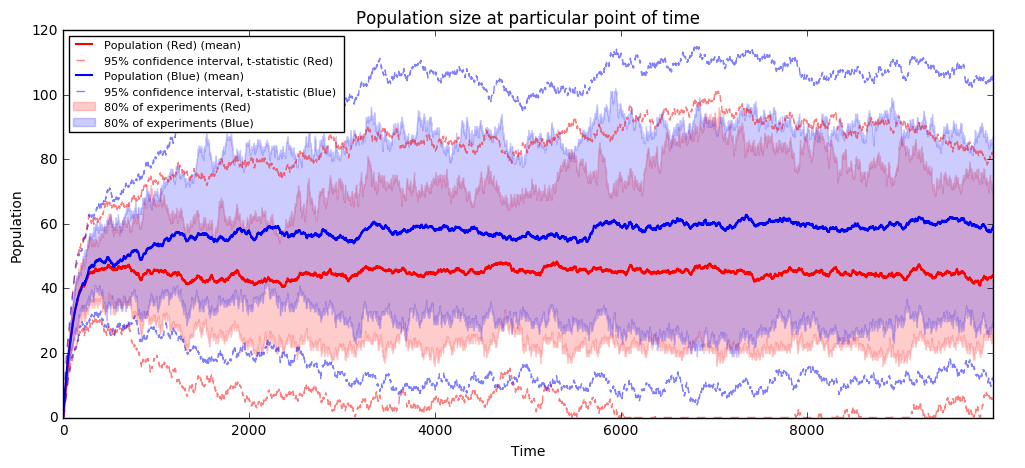

In [124]:
plot_statistic(data, 'Population')
pl.title('Population size at particular point of time')

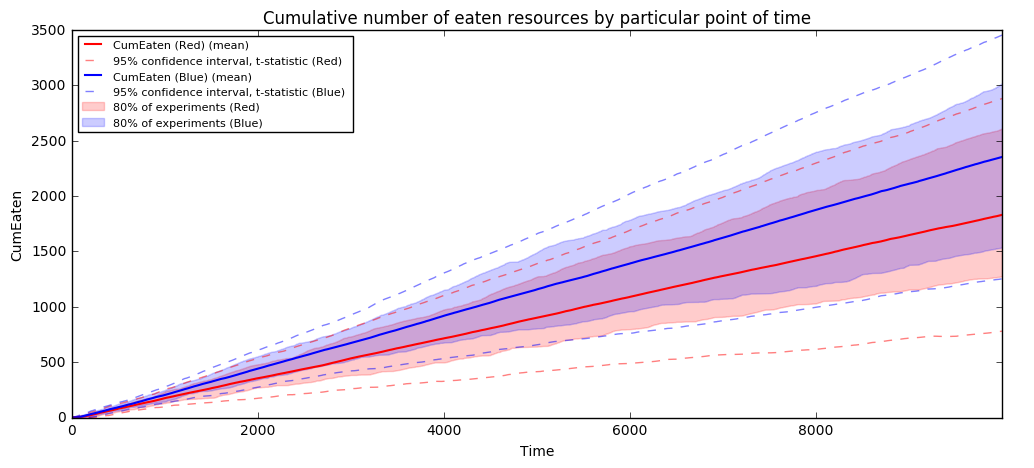

In [125]:
plot_statistic(data, 'CumEaten')
pl.title('Cumulative number of eaten resources by particular point of time')

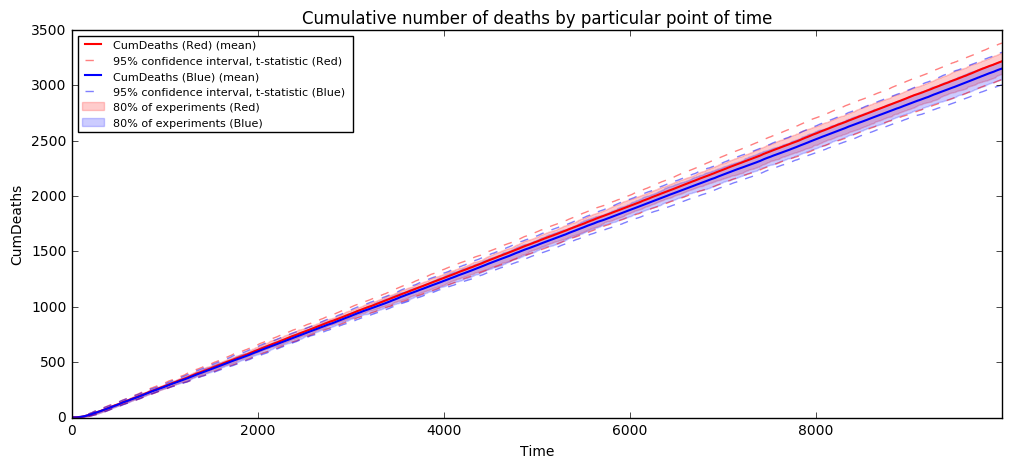

In [126]:
plot_statistic(data, 'CumDeaths')
pl.title('Cumulative number of deaths by particular point of time')